CREDIT CARD FRAUD CLASSIFICATION

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the Dataset
df= pd.read_csv('./card_transdata.csv')
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [5]:
# Counting the missing values in each column
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [7]:
# Making the dataset small for visualisation
df_new = df.sample(n=10000, random_state=42)

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


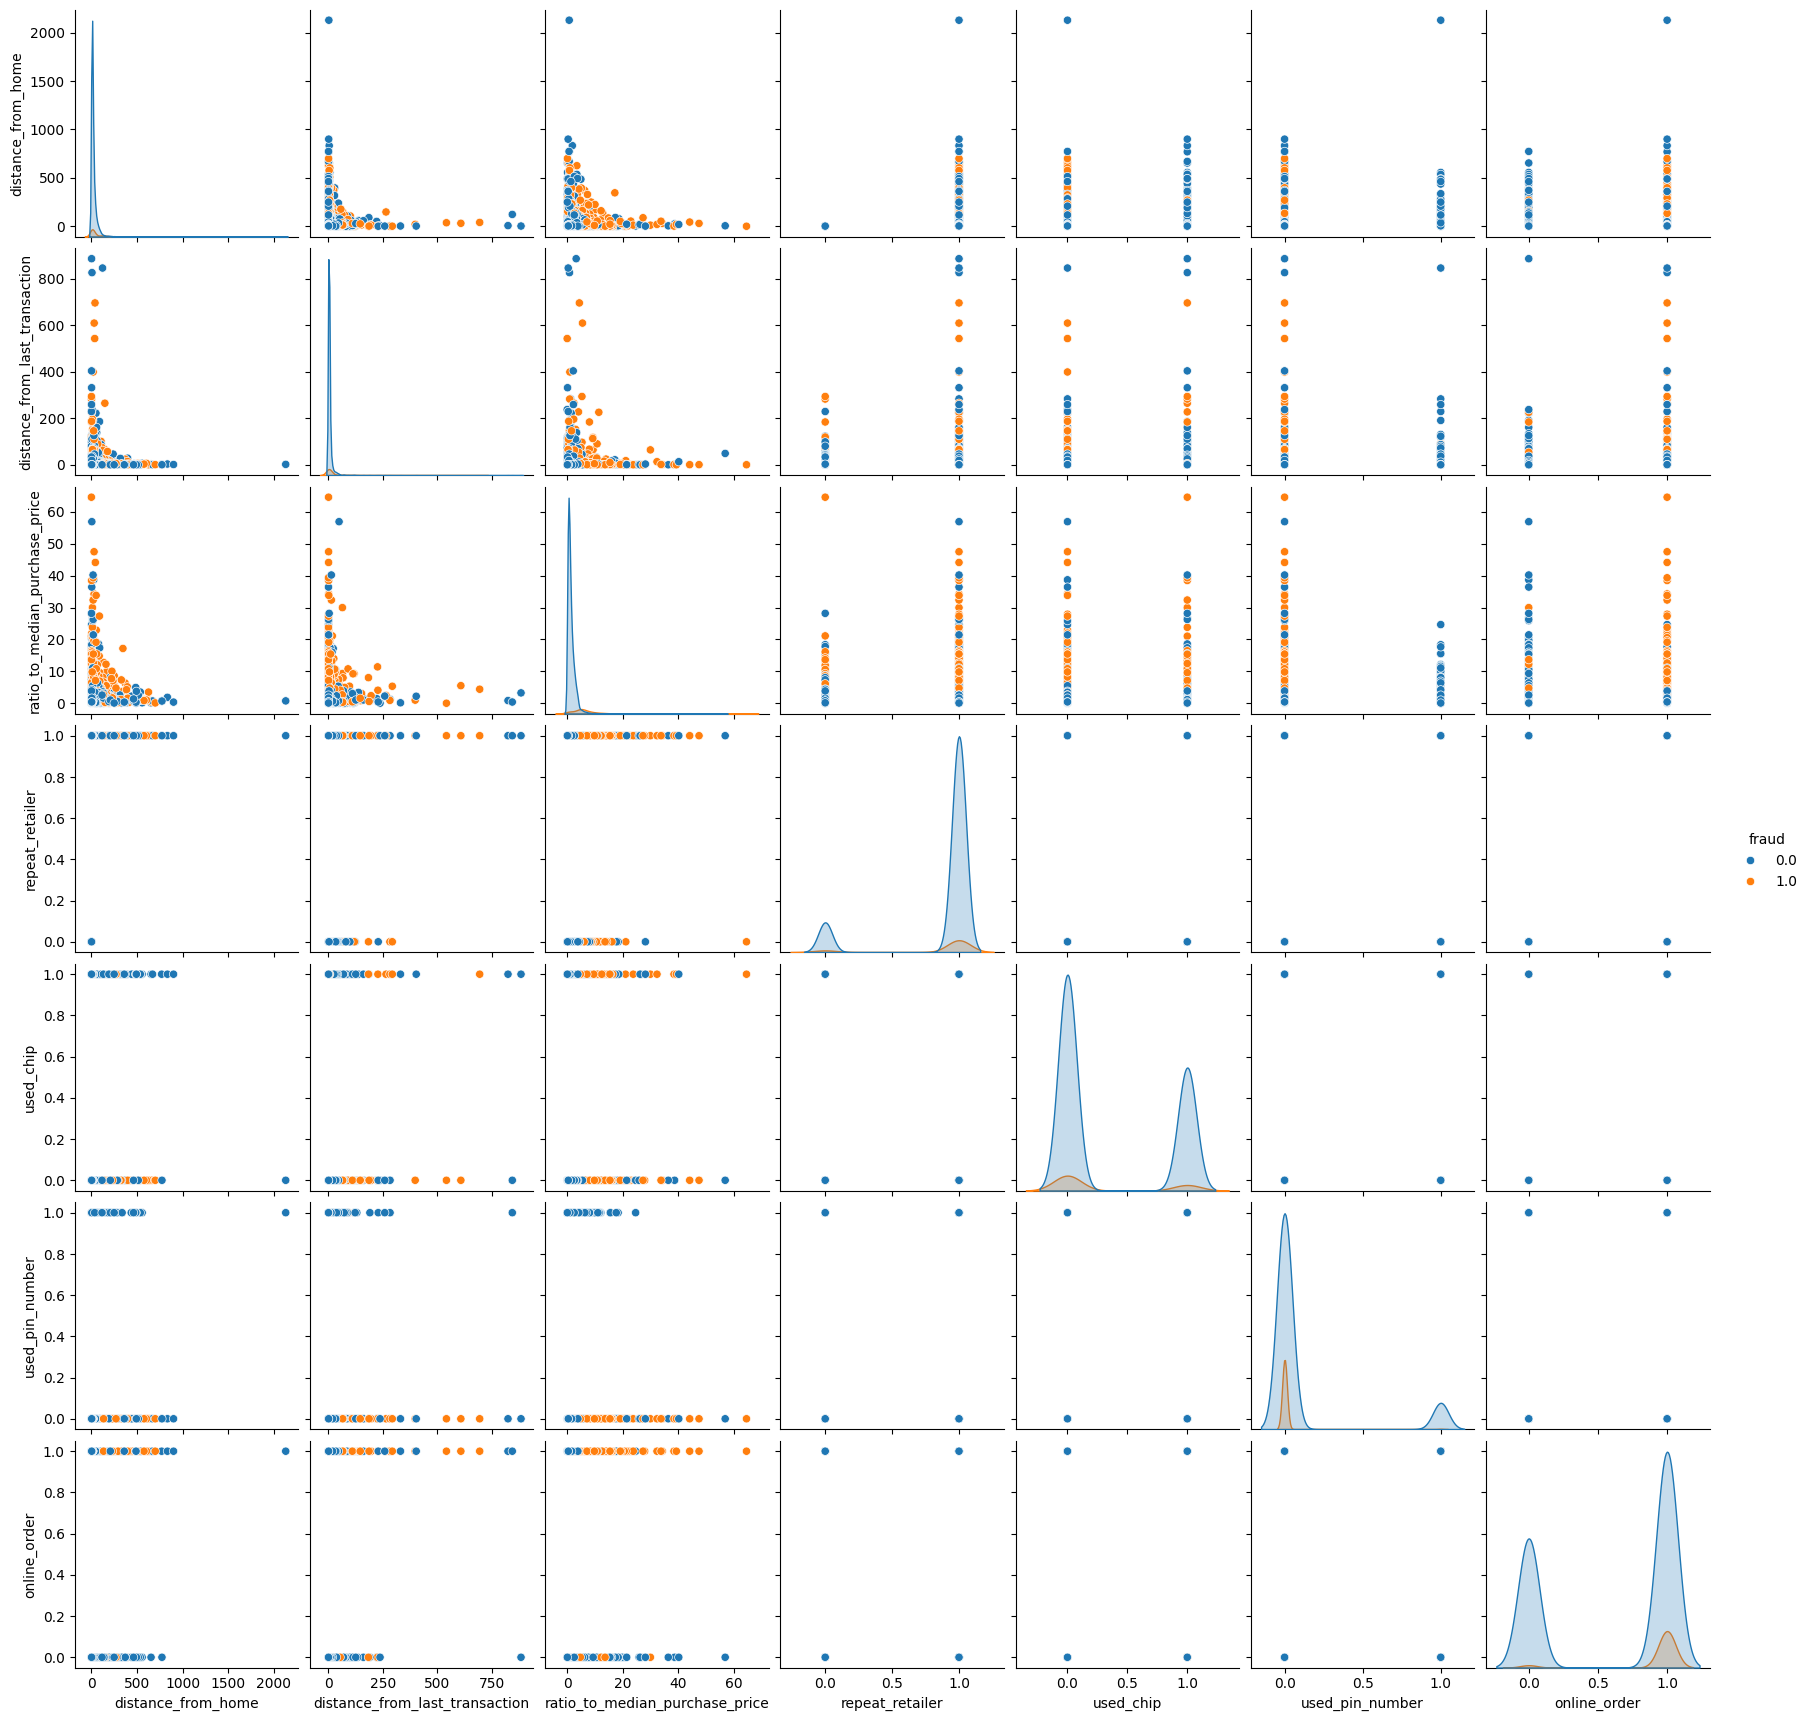

In [21]:
# Visualising how different variables in dataset relate to each other 
sns.pairplot(df_new,hue='fraud')
plt.show()

In [18]:
# Independent Feature
X = df.iloc[:,:-1]
print(X)

        distance_from_home  distance_from_last_transaction  \
0                57.877857                        0.311140   
1                10.829943                        0.175592   
2                 5.091079                        0.805153   
3                 2.247564                        5.600044   
4                44.190936                        0.566486   
...                    ...                             ...   
999995            2.207101                        0.112651   
999996           19.872726                        2.683904   
999997            2.914857                        1.472687   
999998            4.258729                        0.242023   
999999           58.108125                        0.318110   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                             1.945940              1.0        1.0   
1                             1.294219              1.0        0.0   
2                             0.427715       

In [19]:
# Dependent Feature/ Target Variable
y=df.iloc[:,-1:]
print(y)

        fraud
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
...       ...
999995    0.0
999996    0.0
999997    0.0
999998    0.0
999999    0.0

[1000000 rows x 1 columns]


In [22]:
# Importing libraries for splittling the dataset into training and testing set
from sklearn.model_selection import train_test_split

In [23]:
# Splitting the dataset into training and testing set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=42)

In [25]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()
X_train = sd.fit_transform(X_train)
X_test = sd.transform(X_test)
y_train_1d = np.ravel(y_train)

In [26]:
# Importing SVM model
from sklearn.svm import SVC
S = SVC(C = 5 , kernel='rbf')
S.fit(X_train,y_train_1d)

SVC(C=5)

In [27]:
# Predicton
y_hat = S.predict(X_test)

In [28]:
# Checking Accuracy
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_hat))

0.998636


In [29]:
# Printing the classification report
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    228258
         1.0       0.99      0.99      0.99     21742

    accuracy                           1.00    250000
   macro avg       1.00      0.99      1.00    250000
weighted avg       1.00      1.00      1.00    250000



In [30]:
# Printing Confusion Matrix
print(confusion_matrix(y_test,y_hat))

[[228140    118]
 [   223  21519]]
